1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

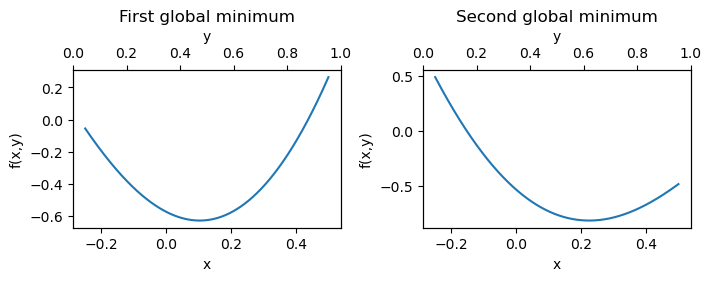

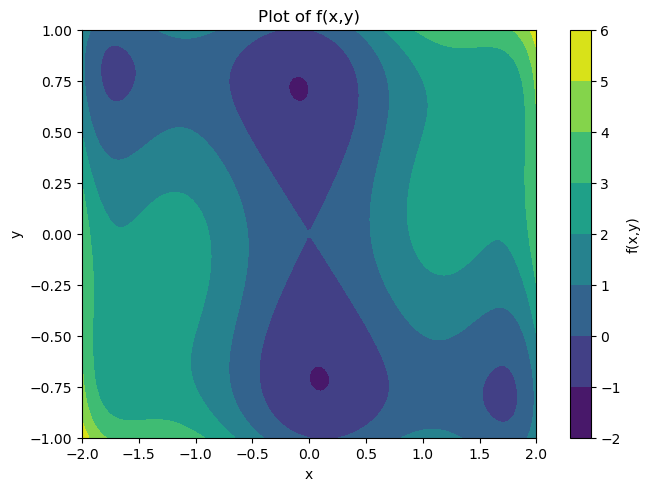

--USING A TRUNCATED NEWTON ALGORITHM--
Starting from [-1,-1]:
x =  0.08984463560284785
y =  -0.7126574052647102
f(-1,-1) =  -1.031628453457467
#iterations =  9

Starting from [-1,1]:
x =  -0.08984827824418622
y =  0.7126451924030817
f(-1,1) =  -1.0316284522374393
#iterations =  7

Starting from [0,0]:
x =  0.0
y =  0.0
f(-1,1) =  0.0
#iterations =  0
Message: Local minimum reached (|pg| ~= 0)


--USING THE NELDER-MEAD ALGORITHM--
Starting from [-1,-1]:
x =  0.08986599437508627
y =  -0.7126820522870823
f(-1,-1) =  -1.0316284464752081
#iterations =  40

Starting from [-1,1]:
x =  -0.08980027876745872
y =  0.7126566764004509
f(-1,1) =  -1.031628446687356
#iterations =  44

Starting from [0,0]:
x =  -0.08985145273780815
y =  0.7126653796314092
f(-1,1) =  -1.031628452567338
#iterations =  52
Message: Optimization terminated successfully.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(param):
    x, y = param
    return (4 - 2.1*x**2 + (x**4/3))*x**2 + x*y + (4*y**2 - 4)*y**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)

Z = f([X,Y])
z = f([x,y])

fig1, ax1 =plt.subplots(1,2, figsize=(7, 2.7), layout='constrained')

x1 = np.linspace(-0.25, 0.5, 10000)
y1 = np.linspace(0.25, 0.75, 10000)
ax1[0].set_title('First global minimum')
ax1[0].plot(x1,f([x1,y1]))
ax1[0].set_xlabel('x')
ax1[0].set_ylabel('f(x,y)')
ax1_1 = ax1[0].twiny()
ax1_1.set_xlabel('y')

x2 = np.linspace(-0.25, 0.5, 10000)
y2 = np.linspace(-1, -0.75, 10000)
ax1[1].set_title('Second global minimum')
ax1[1].plot(x2,f([x2,y2]))
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('f(x,y)')
ax1_2 = ax1[1].twiny()
ax1_2.set_xlabel('y')

fig2, ax2 =plt.subplots(layout='constrained')

ax2.set_title('Plot of f(x,y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contourf(x,y,Z)
cbar = fig2.colorbar(ax2.contourf(x,y,Z), ax=ax2)
cbar.ax.set_ylabel('f(x,y)')
plt.show()

#In the function there are 2 global minima:

print("--USING A TRUNCATED NEWTON ALGORITHM--")
#starting from [-1,-1]
initial_guess = [-1,-1]
bnds = [(-2, 2), (-1,1)]
solution = optimize.minimize(f, initial_guess, method='TNC',bounds=bnds)
print('Starting from [-1,-1]:')
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,-1) = ',solution.fun)
print('#iterations = ',solution.nit)

#starting from [-1,1]
initial_guess = [-1,1]
bnds = [(-2, 2), (-1,1)]
print('\nStarting from [-1,1]:')
solution = optimize.minimize(f, initial_guess, method='TNC', bounds=bnds)
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,1) = ',solution.fun)
print('#iterations = ',solution.nit)

#what happens for an initial guess of f(𝑥,𝑦)=(0,0)

#starting from [0,0]
initial_guess = [0,0]
bnds = [(-2, 2), (-1,1)]
print('\nStarting from [0,0]:')
solution = optimize.minimize(f, initial_guess, method='TNC', bounds=bnds)
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,1) = ',solution.fun)
print('#iterations = ',solution.nit)
print('Message:',solution.message)
#starting from [0,0] the algorithm reaches a local minimum and doesn't converge to a global minimum

print("\n\n--USING THE NELDER-MEAD ALGORITHM--")
#starting from [-1,-1]
initial_guess = [-1,-1]
bnds = [(-2, 2), (-1,1)]
solution = optimize.minimize(f, initial_guess, method='Nelder-Mead')
print('Starting from [-1,-1]:')
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,-1) = ',solution.fun)
print('#iterations = ',solution.nit)

#starting from [-1,1]
initial_guess = [-1,1]
bnds = [(-2, 2), (-1,1)]
print('\nStarting from [-1,1]:')
solution = optimize.minimize(f, initial_guess, method='Nelder-Mead')
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,1) = ',solution.fun)
print('#iterations = ',solution.nit)

#what happens for an initial guess of f(𝑥,𝑦)=(0,0)

#starting from [0,0]
initial_guess = [0,0]
bnds = [(-2, 2), (-1,1)]
print('\nStarting from [0,0]:')
solution = optimize.minimize(f, initial_guess, method='Nelder-Mead')
print('x = ',solution.x[0])
print('y = ',solution.x[1])
print('f(-1,1) = ',solution.fun)
print('#iterations = ',solution.nit)
print('Message:',solution.message)

#Using the Nelder-Mead algorithm, it takes more iterations to reach the minima but it converges also starting from (0,0).




2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

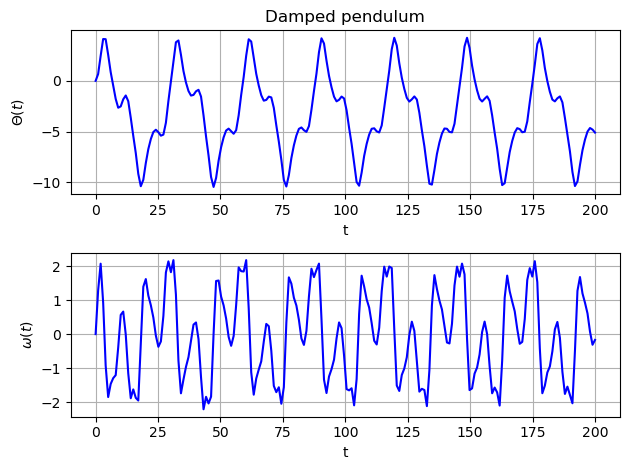

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# set the constants and initial conditions
g = 9.81  # gravity acceleration
Q = 2.0
d = 1.5
l = 10.
Omega = 0.65

X0 = [0,0]

def derivative(X, time, Q, g, l, d, Omega):
    theta, omega = X
    return [omega, - (1/Q)*omega + (g/l)*np.sin(theta) + d*np.cos(Omega*time)]

t = np.linspace(0, 200, 200)

sol = odeint(derivative, X0, t, args=(Q, g, l, d, Omega))

fig, ax =plt.subplots(2)

#plot 𝜃 as a function of the time
ax[0].plot(t, sol[:, 0], 'b')
ax[0].set_title('Damped pendulum')
ax[0].set_xlabel('t')
ax[0].set_ylabel('$\Theta (t)$')
ax[0].grid()
           

#plot omega as a function of the time
ax[1].plot(t, sol[:, 1], 'b')
ax[1].set_xlabel('t')
ax[1].set_ylabel('$\omega (t)$')
ax[1].grid()


plt.tight_layout()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

Peak frequency lynxes: 0.09523809523809523
Peak frequency hares: 0.09523809523809523


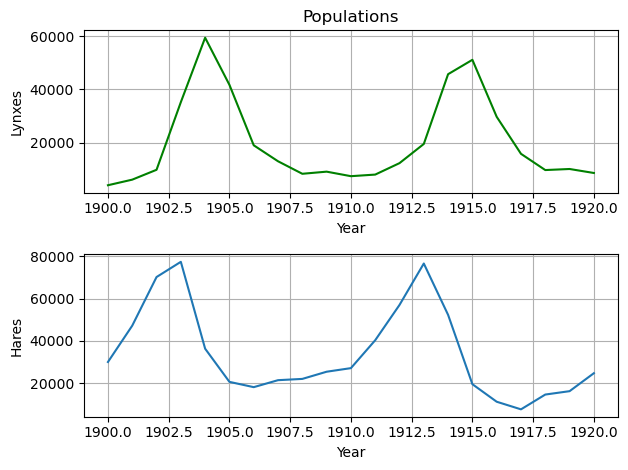

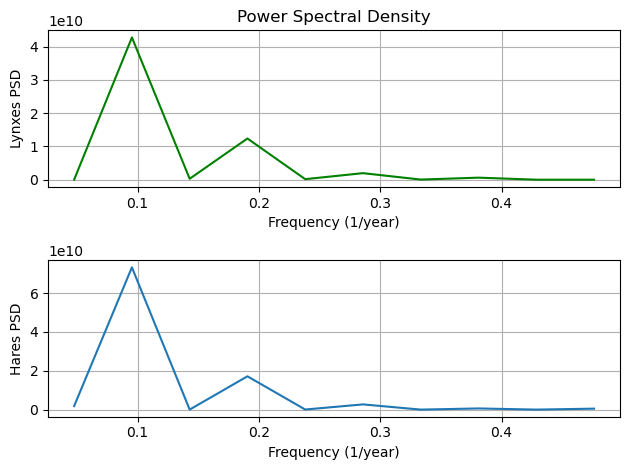

The period of the population of lynxes and hares is 0.095 years (1.14 months),


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

#plotting the data
fig1, ax1 =plt.subplots(2)
ax1[0].plot(year, lynxes,'g')
ax1[0].set_title("Populations")
ax1[0].set_xlabel('Year')
ax1[0].set_ylabel('Lynxes')
ax1[0].grid()

ax1[1].plot(year, hares)
ax1[1].set_xlabel('Year')
ax1[1].set_ylabel('Hares')
ax1[1].grid()
plt.tight_layout()


#compute FT
lynxes_fft = fftpack.fft(lynxes)
hares_fft = fftpack.fft(hares)

lynxes_psd = np.abs(lynxes_fft) ** 2
hares_psd = np.abs(hares_fft) ** 2

#setting the time step as 0.1 years

time_step = 1
fftfreq = fftpack.fftfreq(len(lynxes_psd), d=time_step)

#consider only the positive frequencies
i = fftfreq > 0

fig2, ax2 =plt.subplots(2)
ax2[0].plot(fftfreq[i],lynxes_psd[i],'g')
ax2[0].set_title("Power Spectral Density")
ax2[0].set_xlabel('Frequency (1/year)')
ax2[0].set_ylabel('Lynxes PSD')
ax2[0].grid()


ax2[1].plot(fftfreq[i],hares_psd[i])
ax2[1].set_xlabel('Frequency (1/year)')
ax2[1].set_ylabel('Hares PSD')
ax2[1].grid()

# find the max of freqs array
fftfreq_pos = fftfreq[i]
hares_psd_pos = hares_psd[i]
lynxes_psd_pos = lynxes_psd[i] 

print("Peak frequency lynxes:", fftfreq_pos[np.argmax(lynxes_psd_pos)])
print("Peak frequency hares:", fftfreq_pos[np.argmax(hares_psd_pos)])

plt.tight_layout()
plt.show()

print("The period of the population of lynxes and hares is 0.095 years (1.14 months),")


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

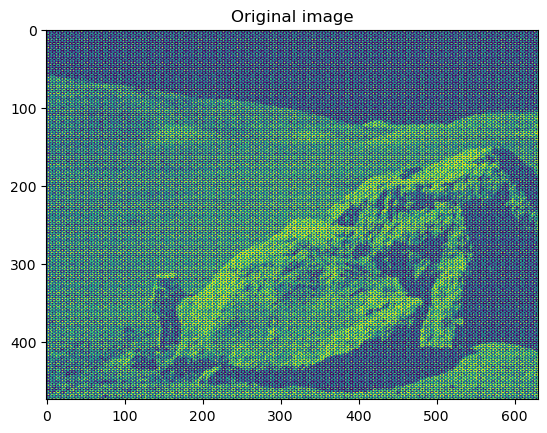

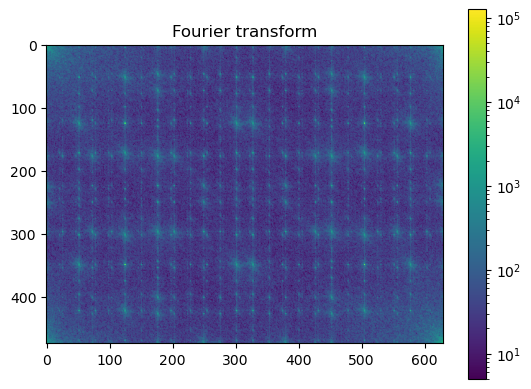

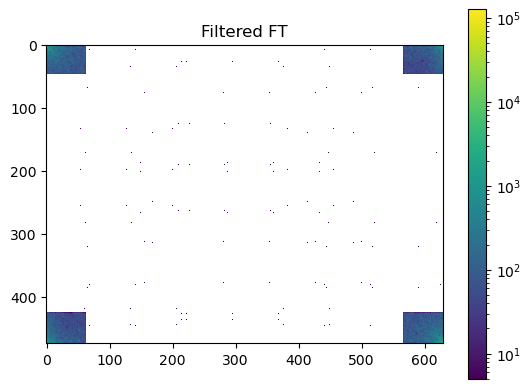

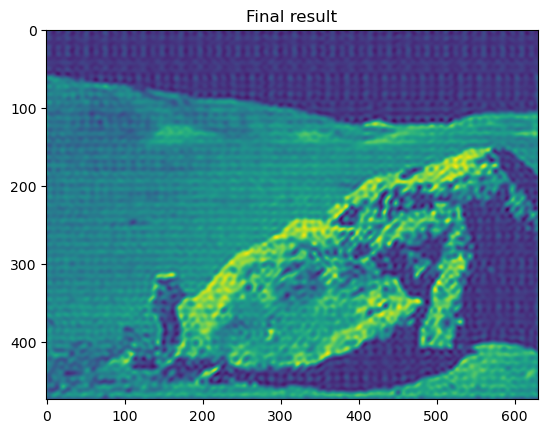

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm

#import the image
image = plt.imread("images/moonlanding.png")
plt.imshow(image)
plt.title('Original image')
plt.show()

#compute 2D FFT
image_fft = fftpack.fft2(image)

#plot the spectrum (Fourier transform of) the image

plt.figure()
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

plt.show()

#Inspect the spectrum
image_fft_filt = image_fft.copy()

rows, col = image_fft_filt.shape

image_fft_filt[int(rows*0.1):int(rows*(1-0.1))] = 0
image_fft_filt[:, int(col*0.1):int(col*(1-0.1))] = 0

plt.figure()
plt.imshow(np.abs(image_fft_filt), norm=LogNorm(vmin=5))
plt.title('Filtered FT')
plt.colorbar()
plt.show()

plt.figure()
image_ifft = fftpack.ifft2(image_fft_filt).real
plt.imshow(image_ifft)
plt.title('Final result')
plt.show()
